In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



[INFO] Loading datasets...
[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="densenet121",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...
[INFO] Model initialized successfully!


C:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    # num_epochs=num_epochs,
    device=device,
    save_path="outputs/models/baseline/densenet121.pt",
    early_stop_patience=5,     # Stop after 5 epochs without improvement
    monitor_metric="val_recall",
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



Epoch [1]:
    Train Loss: 0.4945, Train Acc: 0.7679
    Val Loss:   0.4170, Val Acc:   0.8184
    Val Recall: 0.9024, Val F1:   0.8588
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9024


Epoch [2]:
    Train Loss: 0.3812, Train Acc: 0.8288
    Val Loss:   0.3774, Val Acc:   0.8333
    Val Recall: 0.9472, Val F1:   0.8743
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9472


Epoch [3]:
    Train Loss: 0.3432, Train Acc: 0.8484
    Val Loss:   0.3468, Val Acc:   0.8383
    Val Recall: 0.9187, Val F1:   0.8743
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/5


Epoch [4]:
    Train Loss: 0.3096, Train Acc: 0.8696
    Val Loss:   0.3664, Val Acc:   0.8483
    Val Recall: 0.8333, Val F1:   0.8705
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/5


Epoch [5]:
    Train Loss: 0.2905, Train Acc: 0.8786
    Val Loss:   0.3453, Val Acc:   0.8532
    Val Recall: 0.9593, Val F1:   0.8889
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9593


Epoch [6]:
    Train Loss: 0.2703, Train Acc: 0.8887
    Val Loss:   0.3232, Val Acc:   0.8632
    Val Recall: 0.9024, Val F1:   0.8898
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/5


Epoch [7]:
    Train Loss: 0.2777, Train Acc: 0.8887
    Val Loss:   0.3197, Val Acc:   0.8632
    Val Recall: 0.9390, Val F1:   0.8936
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/5


Epoch [8]:
    Train Loss: 0.2695, Train Acc: 0.8871
    Val Loss:   0.3122, Val Acc:   0.8706
    Val Recall: 0.9350, Val F1:   0.8984
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 3/5


Epoch [9]:
    Train Loss: 0.2526, Train Acc: 0.8983
    Val Loss:   0.3077, Val Acc:   0.8706
    Val Recall: 0.9228, Val F1:   0.8972
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 4/5


Epoch [10]:
    Train Loss: 0.2439, Train Acc: 0.9004
    Val Loss:   0.3316, Val Acc:   0.8458
    Val Recall: 0.9553, Val F1:   0.8835
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 5/5
[INFO] Training stopped after 10 epochs.

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.9534883720930233, 'recall': 0.7735849056603774, 'f1-score': 0.8541666666666666, 'support': 159.0}, 'Fire': {'precision': 0.8718861209964412, 'recall': 0.9760956175298805, 'f1-score': 0.9210526315789473, 'support': 251.0}, 'accuracy': 0.8975609756097561, 'macro avg': {'precision': 0.9126872465447322, 'recall': 0.874840261595129, 'f1-score': 0.8876096491228069, 'support': 410.0}, 'weighted avg': {'precision': 0.9035318720314571, 'recall': 0.8975609756097561, 'f1-score': 0.8951139281129653, 'support': 410.0}}, 'confusion_matrix': array([[123,  36],
       [  6, 245]]), 'roc_auc': np.float64(0.874840261595129)}


[INFO] Saving training and evaluation results...


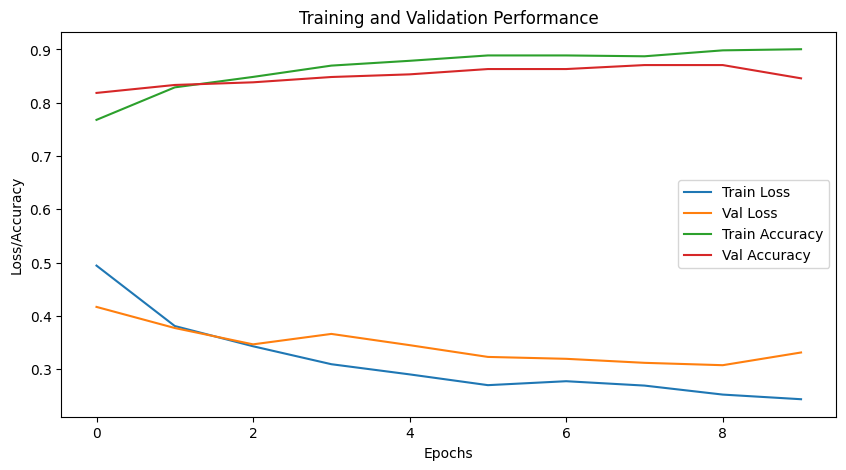

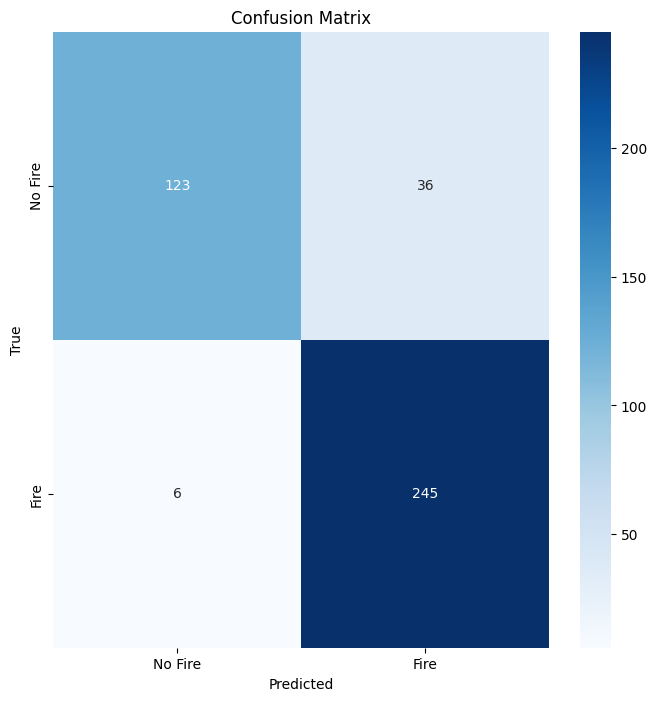

[INFO] Results saved successfully!


In [10]:
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/resnet18_baseline_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/resnet18_baseline_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")